In [25]:
library(tidyverse)
library(tidymodels)
install.packages("themis")
library(themis)

also installing the dependencies ‘RANN’, ‘ROSE’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [30]:
cleveland <- read_csv("processed.cleveland.data.csv", 
                      col_names = c("age",
                                    "sex", #c #1 male, 0 female
                                     "cp", #c #chest pain type
                                    "trestbps", 
                                    "chol", 
                                    "fbs", #c
                                    "restecg", #c
                                    "thalach", 
                                    "exang", #c
                                    "oldpeak", 
                                    "slope", #c
                                    "ca", 
                                    "thal", #c
                                    "num"))
slice(cleveland, 1: 5)
#chest pain type based on predictor variables

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [43]:
set.seed(101)

data <- select(cleveland, trestbps, chol, thalach, oldpeak, cp) |>
mutate(cp = as_factor(cp))

spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
set_engine("kknn") |>
set_mode("classification")

heart_recipe <- recipe(cp ~ trestbps + chol + thalach + oldpeak, data = data) |>
step_scale(all_predictors()) |>
step_center(all_predictors()) |>
step_upsample(cp, over_ratio = 1)

heart_wf <- workflow() |>
add_recipe(heart_recipe) |>
add_model(spec) |>
fit(data = data)

preds <- predict(heart_wf, data) |>
bind_cols(data)


accuracy <- nrow(filter(preds, .pred_class == cp))/303
accuracy 

# neighbors vs. accuracy
# 5 - .63
# 10 - .51
# 7 - .56
# 3 - .72
# 2 - .95


# improvements:
# 1. tune neighbours for max accuracy
# 2. oversample data in a better way, since cp type 1 is way less common than cp type 4 in the dataset.

[1] 0.9570957

In [18]:
counts <- data |>
group_by(cp) |>
summarize(count=n())

counts

cp,count
<fct>,<int>
1,23
2,50
3,86
4,144


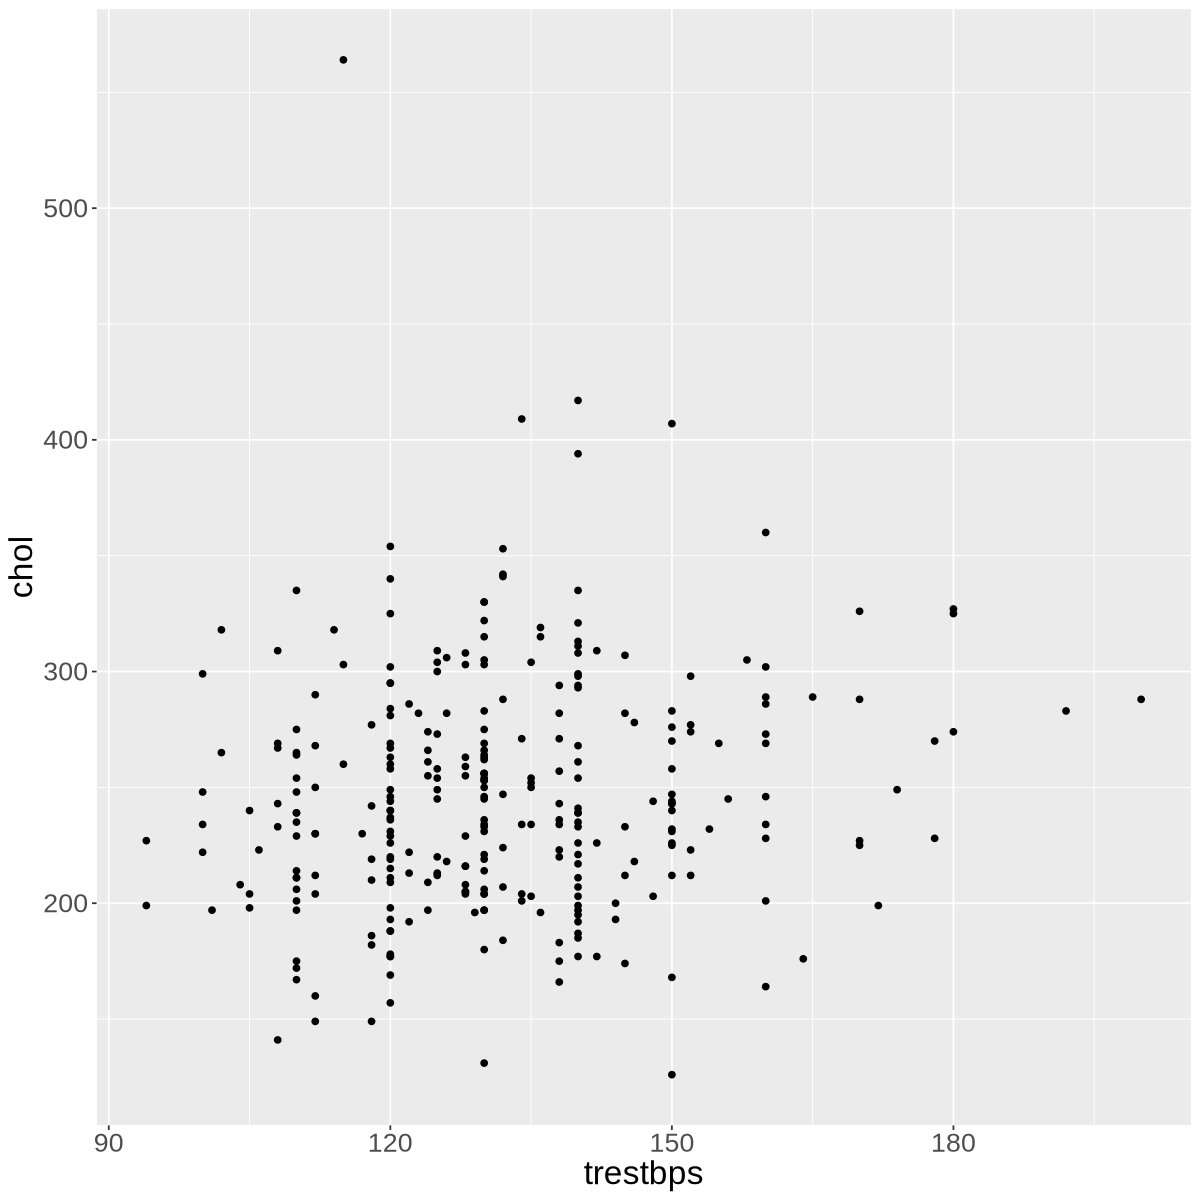

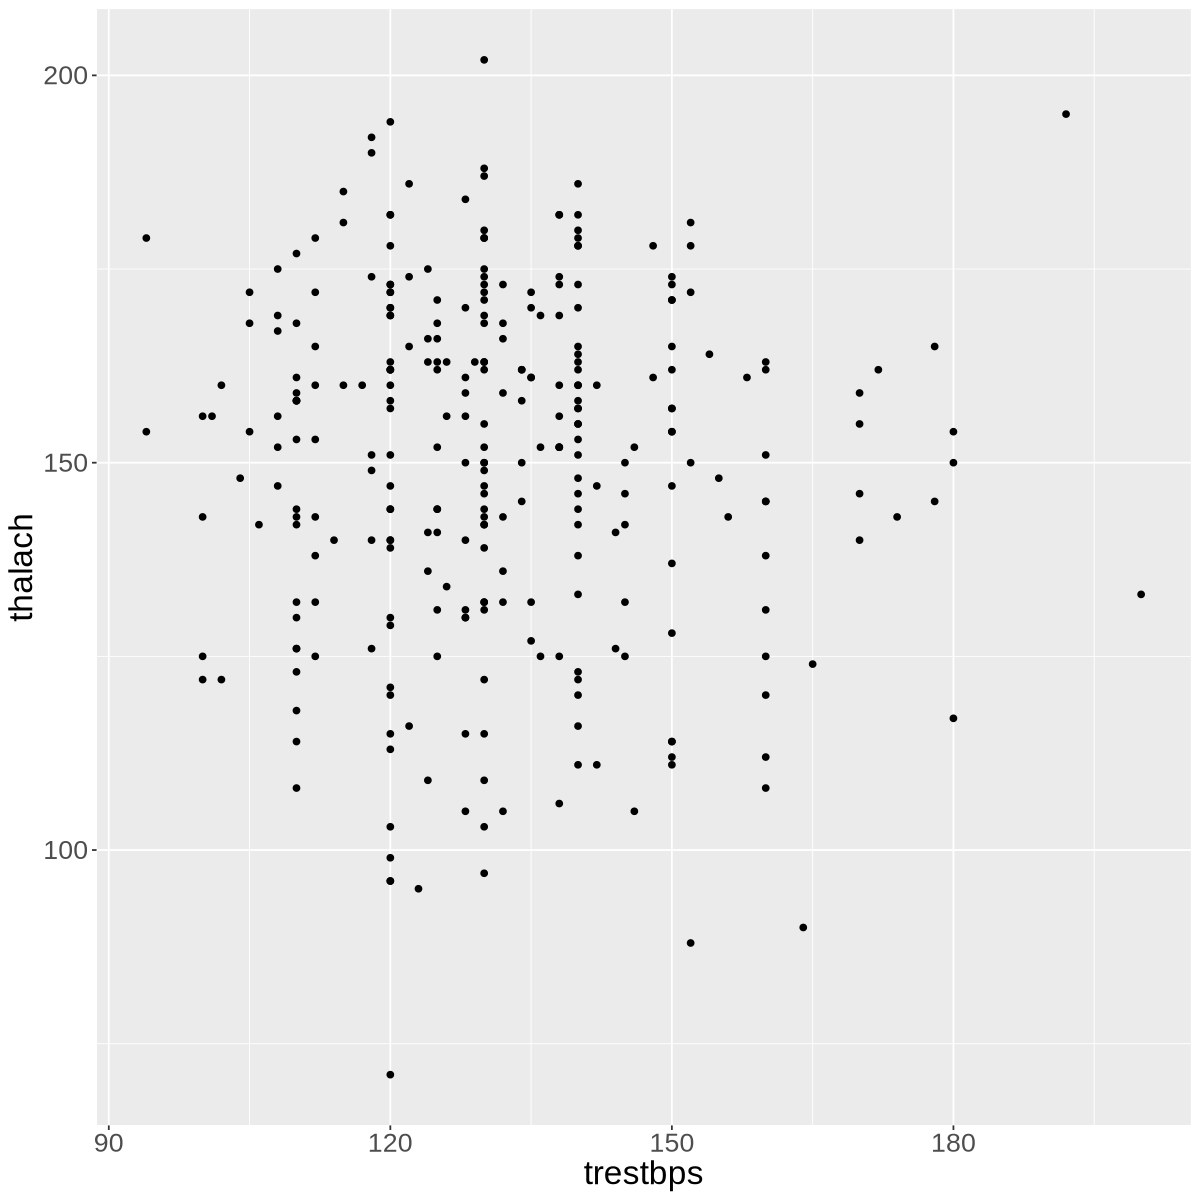

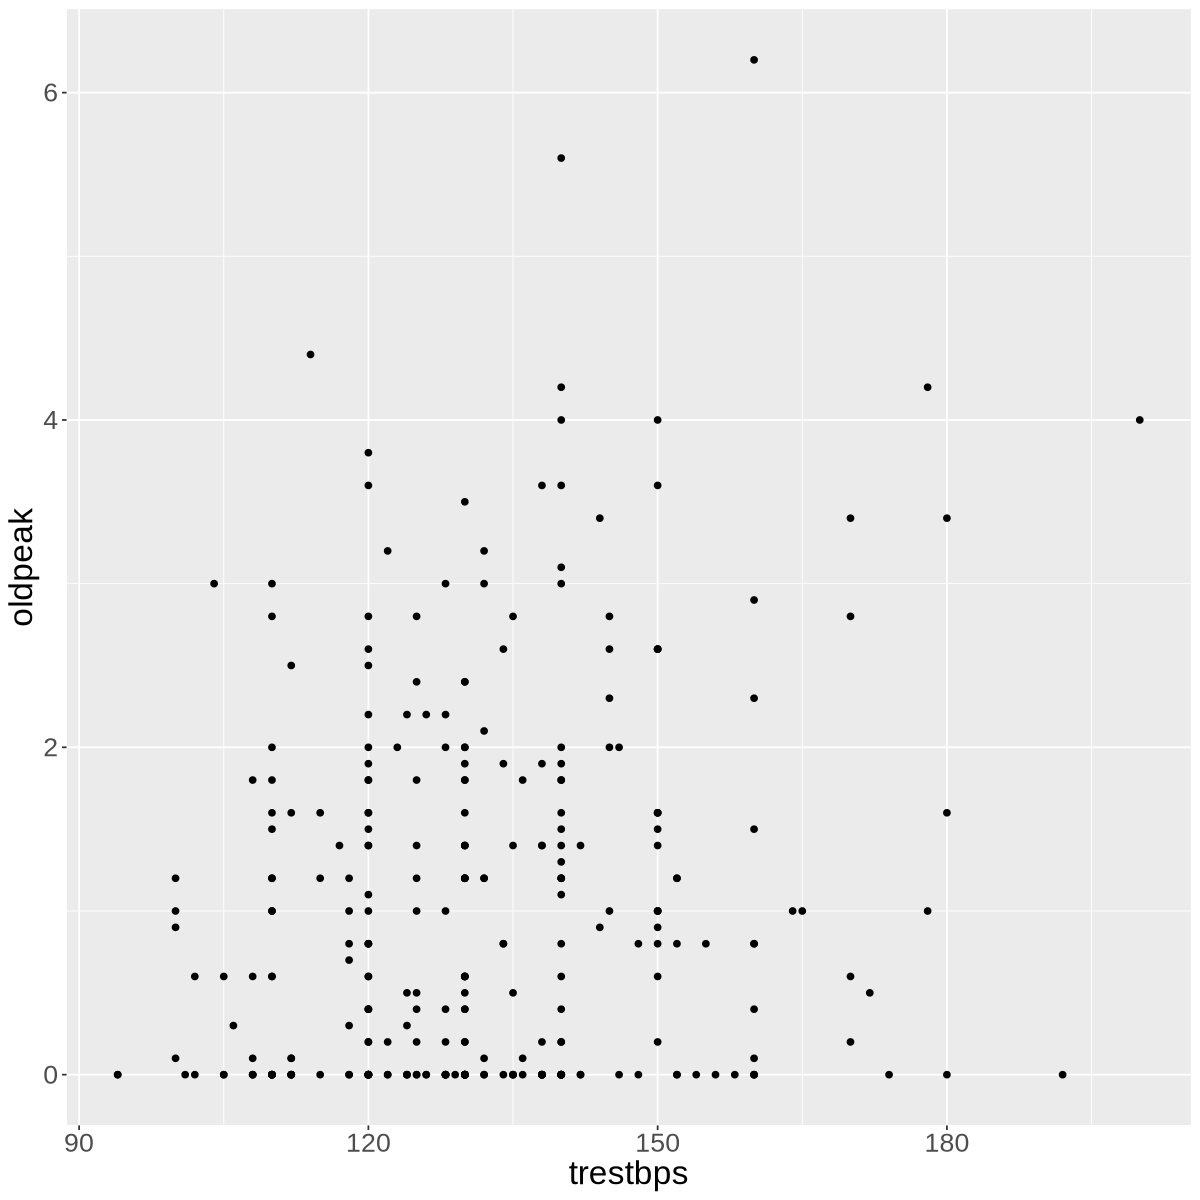

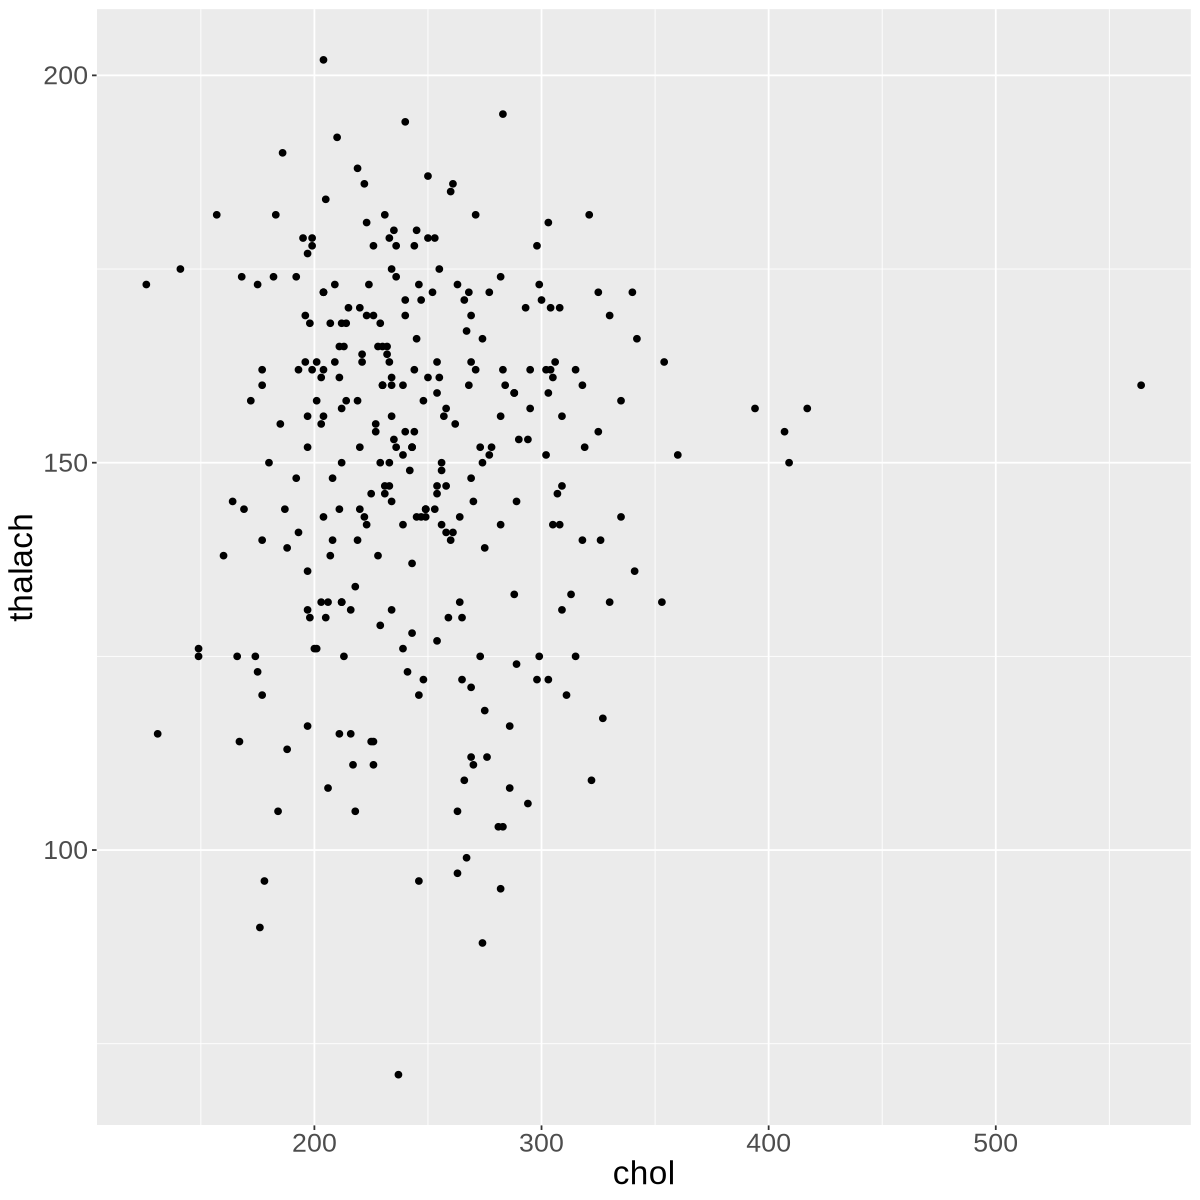

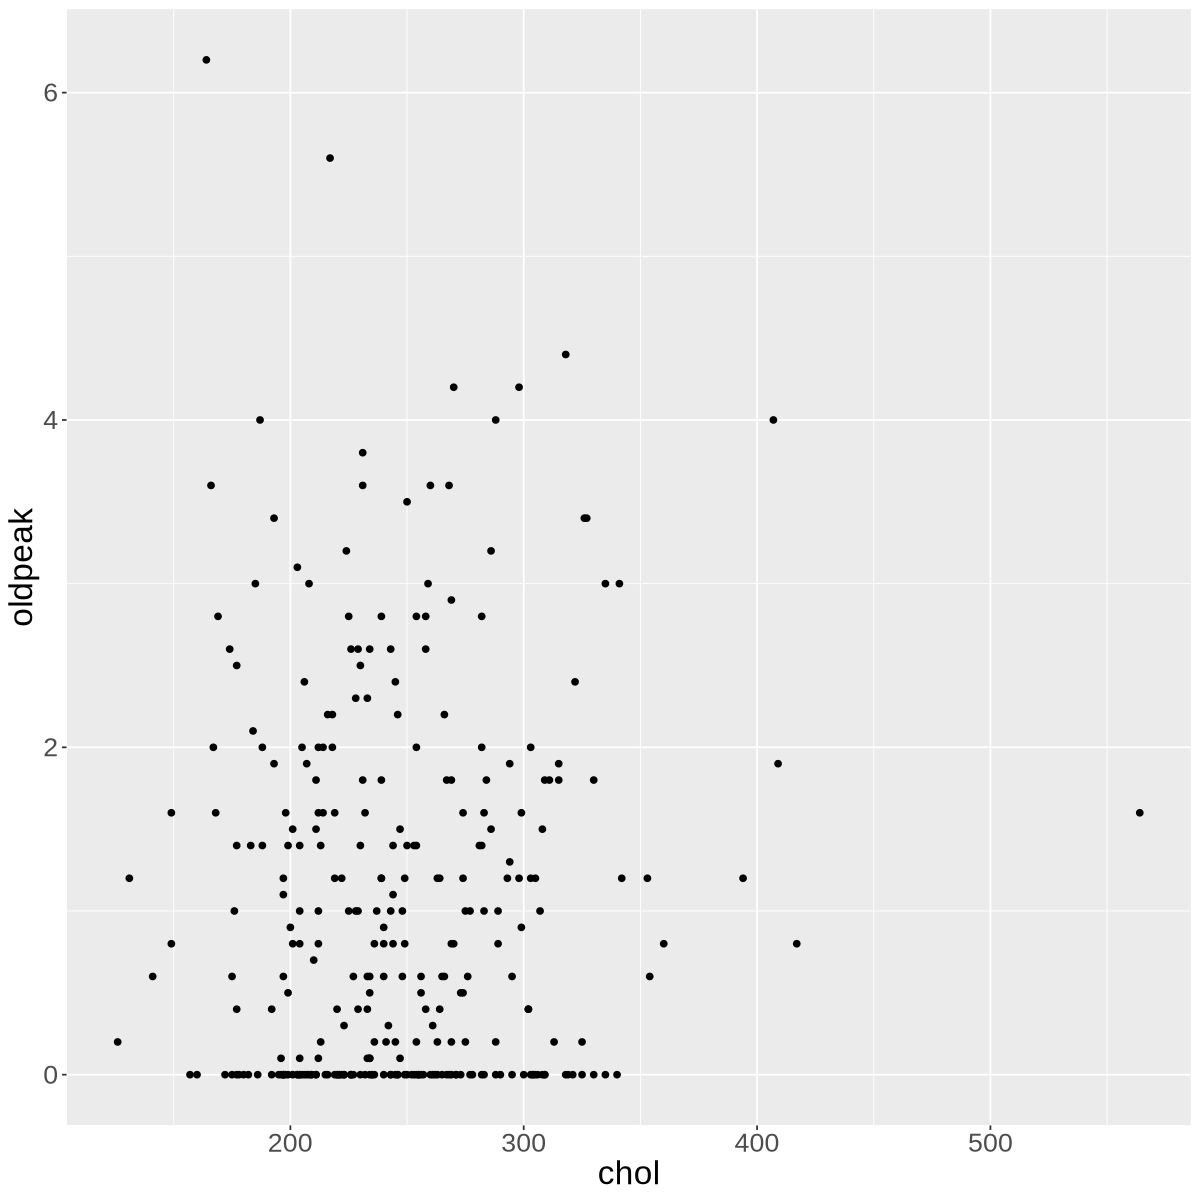

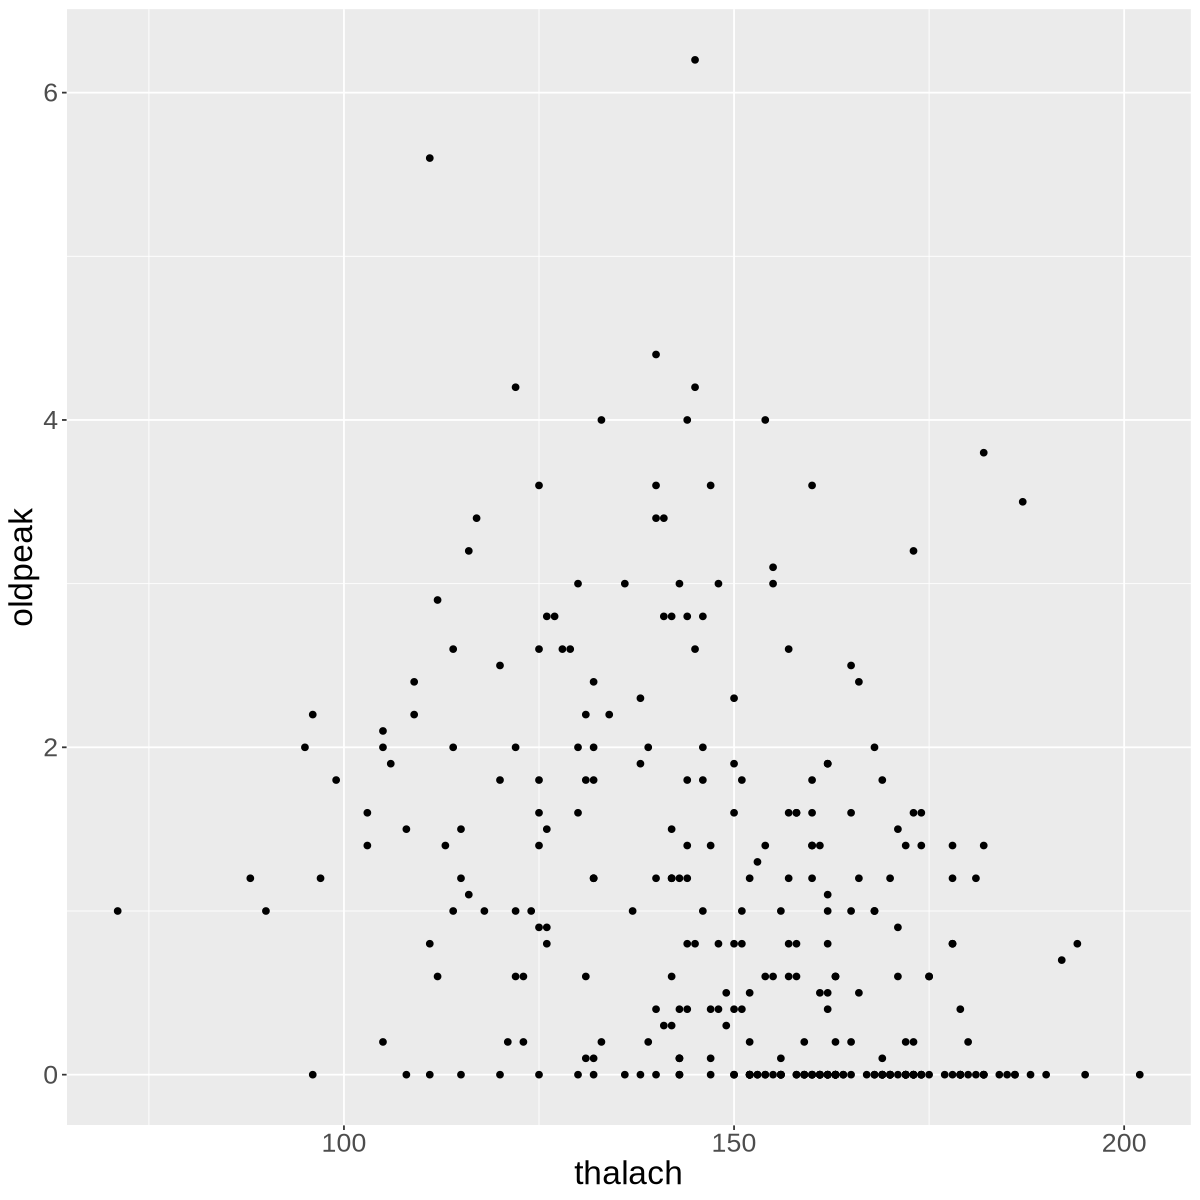

In [54]:
options(repr.plot.width = 10, repr.plot.height = 10)
plot1 <- data |>
ggplot(aes(x = trestbps, y= chol)) +
geom_point() + 
labs(x = "trestbps", y = "chol") + 
theme(text = element_text(size = 20))

plot2 <- data |>
ggplot(aes(x = trestbps, y= thalach)) +
geom_point() + 
labs(x = "trestbps", y = "thalach") + 
theme(text = element_text(size = 20))

plot3 <- data |>
ggplot(aes(x = trestbps, y= oldpeak)) +
geom_point() + 
labs(x = "trestbps", y = "oldpeak") + 
theme(text = element_text(size = 20))

plot4 <- data |>
ggplot(aes(x = chol, y= thalach)) +
geom_point() + 
labs(x = "chol", y = "thalach") + 
theme(text = element_text(size = 20))

plot5 <- data |>
ggplot(aes(x = chol, y= oldpeak)) +
geom_point() + 
labs(x = "chol", y = "oldpeak") + 
theme(text = element_text(size = 20))

plot6 <- data |>
ggplot(aes(x = thalach, y= oldpeak)) +
geom_point() + 
labs(x = "thalach", y = "oldpeak") + 
theme(text = element_text(size = 20))

plot1
plot2
plot3
plot4
plot5
plot6

# Predicting chest pain in association with heart disease patients in Cleveland:

## 1. Introduction

**Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal:**


Heart disease, better known as cardiovascular disease is a prominent and commonly fatal disease that impacts the heart, as well as blood vessels. It covers a broad spectrum of subdiseases, such as arrhythmias, heart failure, and coronary artery disease. Certain deviations in categories like family history, high blood pressure and high cholesterol may make an individual more susceptible to heart diseases. It may be possible to reduce the potential risks if discovered at an early enough stage, however this outcome is not guaranteed. Hence, using the knowledge we have acquired in data science, we have decided to take on the heart disease dataset for our project and discover how resting blood pressure, cholesterol, maximum heart rate achieved, and ST depression induced by exercise can be used to predict the type of chest pain a patient experiences. In this way, we intend to determine the extent to which the type of chest pain contributes to the heart disease the pateint is suffering from. 

**Identify and describe the dataset that will be used to answer the question**

We have decided to use the "processed.cleveland.data" dataset for our project. The dataset contains several subcategories which are essential for predicting heart disease. However, we have decided to focus on resting blood pressure, cholesterol, maximum heart rate achieved, and ST depression induced by exercise to predict chest pain. The subcategories are as follows:

- cp: chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)- trestbps: resting blood pressure (in mmHg)- 
chol: serum cholesterol in mg/d
- thalach: maximum heart rate achieved
- oldpeak = ST depression induced by exercise (relative to rest)l


## 2. Preliminary exploratory data analysis